In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train_values.csv')
labels = pd.read_csv('train_labels_abiUmgM.csv')

In [3]:
data.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [4]:
data.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000
mean,99999.500000,1.570935,1.154880,1.482605,1.061385,142.574940,2.702950,226.974970,28.202045,166.335230,...,4.762685,1.417540,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505
std,57735.171256,0.559410,0.365066,0.822156,0.246043,142.559487,0.545658,106.655259,15.593383,92.852518,...,0.887328,0.577133,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,67.000000,2.000000,154.000000,14.000000,83.000000,...,5.000000,1.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000
50%,99999.500000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,181.000000,...,5.000000,1.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000
75%,149999.250000,2.000000,1.000000,2.000000,1.000000,179.000000,3.000000,318.000000,41.000000,249.000000,...,5.000000,2.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000
max,199999.000000,4.000000,3.000000,3.000000,3.000000,11104.000000,3.000000,408.000000,52.000000,316.000000,...,7.000000,4.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000


In [5]:
data['rate_spread'] = labels['rate_spread']

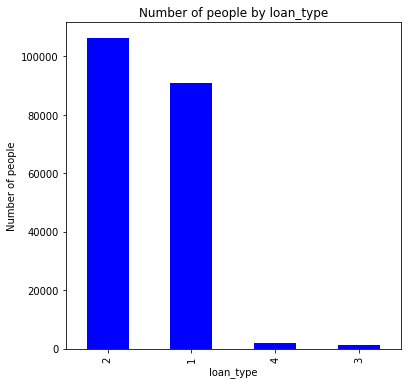

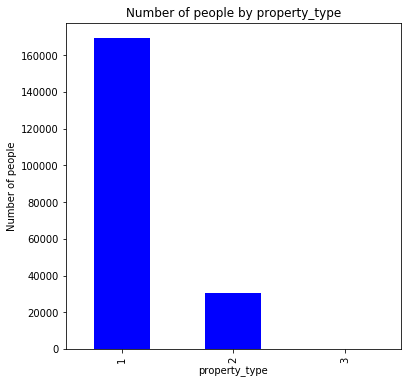

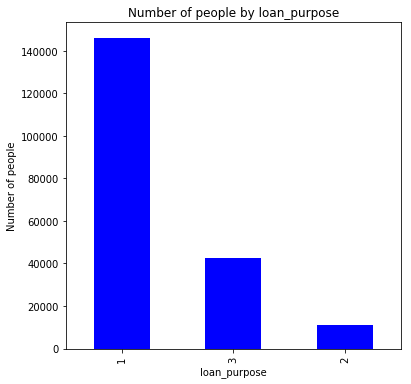

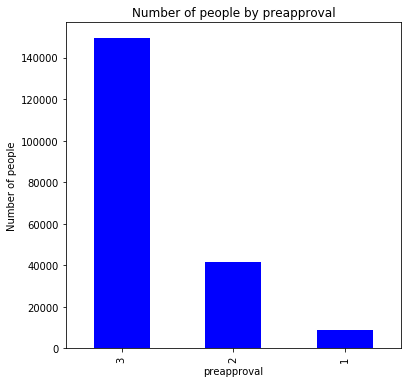

In [6]:
#Make bar plots of categorical data
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        counts = data[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of people by ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of people')
        plt.show
        
plot_cols = ['loan_type', 'property_type', 'loan_purpose', 'preapproval']
plot_bars(data, plot_cols)

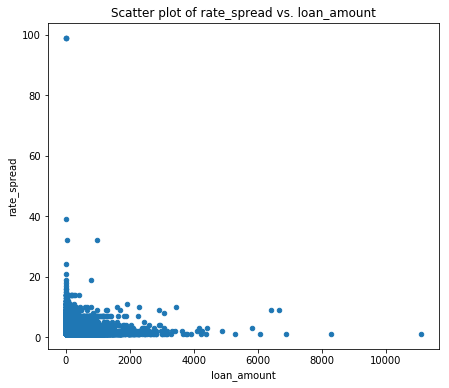

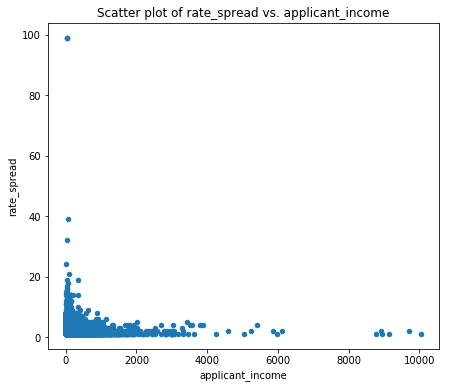

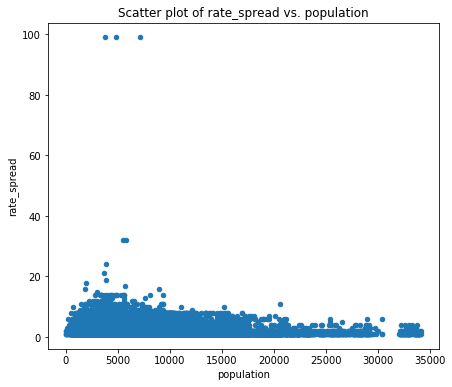

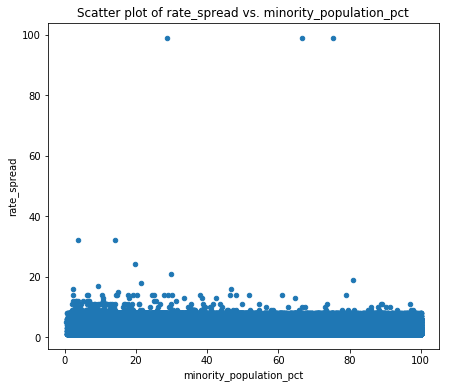

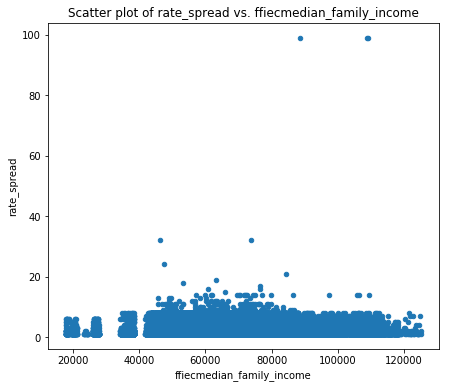

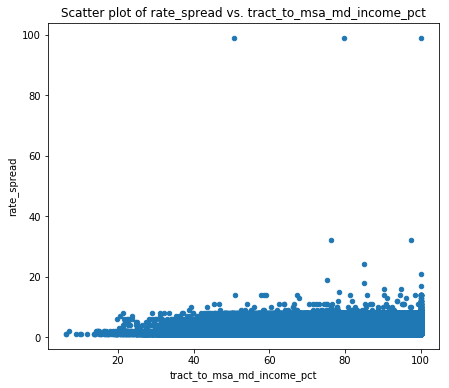

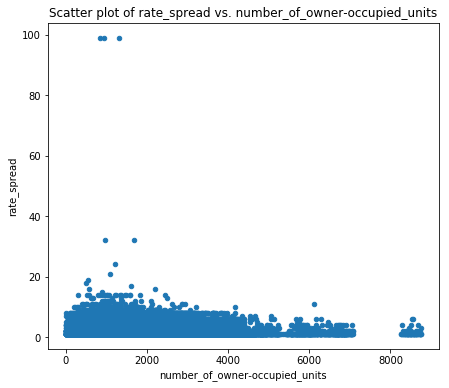

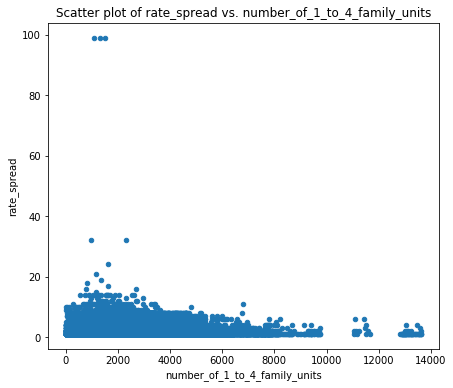

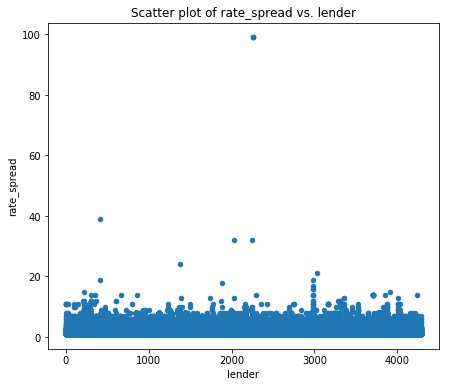

In [7]:
def plot_scatter(data, cols, col_y = 'rate_spread'):
    for col in cols:
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca()
        data.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)
        ax.set_ylabel(col_y)
        plt.show()
        
num_cols = ['loan_amount', 'applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','lender']
plot_scatter(data, num_cols)

In [8]:
# def plot_scatter_t(data, cols, col_y = 'rate_spread', alpha = 1.0):
#     for col in cols:
#         fig = plt.figure(figsize=(7,6)) # define plot area
#         ax = fig.gca() # define axis   
#         data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
#         ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
#         ax.set_xlabel(col) # Set text for the x axis
#         ax.set_ylabel(col_y)# Set text for y axis
#         plt.show()

# plot_scatter_t(data, num_cols, alpha = 0.2)    

In [9]:
# def plot_desity_2d(data, cols, col_y = 'rate_spread', kind ='kde'):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.jointplot(col, col_y, data=data, kind=kind)
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel(col_y)# Set text for y axis
#         plt.show()

# plot_desity_2d(data, num_cols)      

In [10]:
# def plot_box(data, cols, col_y = 'rate_spread'):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.boxplot(col, col_y, data=data)
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel(col_y)# Set text for y axis
#         plt.show()
        
# cat_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 
#             'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
# plot_box(data, cat_cols)    

In [11]:
num_cols = ['loan_amount', 'applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','lender']


In [12]:
from numpy import cov

def covariance(X, y, data_cols):
    for col in data_cols:
        print(col)
        covar = cov(X[col], y)
        print(covar)

#Calculate covariance between rate spread and other numerical features
covariance(data, data['rate_spread'], num_cols)

loan_amount
[[ 2.03232073e+04 -5.15298522e+01]
 [-5.15298522e+01  2.74501733e+00]]
applicant_income
[[       nan        nan]
 [       nan 2.74501733]]
population
[[       nan        nan]
 [       nan 2.74501733]]
minority_population_pct
[[       nan        nan]
 [       nan 2.74501733]]
ffiecmedian_family_income
[[       nan        nan]
 [       nan 2.74501733]]
tract_to_msa_md_income_pct
[[       nan        nan]
 [       nan 2.74501733]]
number_of_owner-occupied_units
[[       nan        nan]
 [       nan 2.74501733]]
number_of_1_to_4_family_units
[[       nan        nan]
 [       nan 2.74501733]]
lender
[[ 1.61578215e+06 -2.35914247e+02]
 [-2.35914247e+02  2.74501733e+00]]


In [13]:
from scipy.stats import pearsonr

def pearsons(X, y, data_cols):
    for col in data_cols:
        print(col)
        corr, _ = pearsonr(data[col],data['rate_spread'])
        print('Pearsons correlation: %.3f' % corr)

#Calculate pearson's correlation between rate spread and other numerical features
pearsons(data, data['rate_spread'], num_cols)

loan_amount
Pearsons correlation: -0.218
applicant_income
Pearsons correlation: nan
population
Pearsons correlation: nan
minority_population_pct
Pearsons correlation: nan
ffiecmedian_family_income
Pearsons correlation: nan
tract_to_msa_md_income_pct
Pearsons correlation: nan
number_of_owner-occupied_units
Pearsons correlation: nan
number_of_1_to_4_family_units
Pearsons correlation: nan
lender
Pearsons correlation: -0.112


In [14]:
labels.describe()


,row_id,rate_spread
count,200000.000000,200000.000000
mean,99999.500000,1.979110
std,57735.171256,1.656809
min,0.000000,1.000000
25%,49999.750000,1.000000
50%,99999.500000,1.000000
75%,149999.250000,2.000000
max,199999.000000,99.000000


(199992, 2)


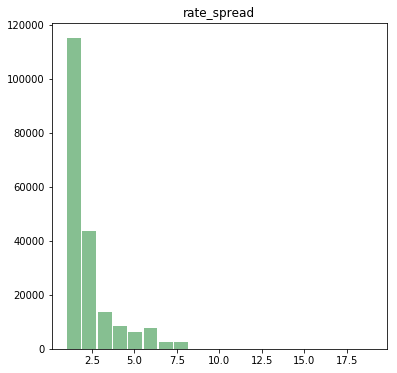

In [15]:
#Created a histogram for the rate_spread variable
labels2 = labels.loc[labels['rate_spread'] < 21]

print(labels2.shape)
hist = labels2.hist(column='rate_spread', bins=20, grid=False, figsize=(6,6), color='#86bf91', zorder=2, rwidth=0.9)


In [16]:
data['rate_spread'] = labels['rate_spread']
print(data.loc[data['applicant_sex'] == 1][['rate_spread']].mean())
print(data.loc[data['applicant_sex'] == 2][['rate_spread']].mean())
# data.loc[data['applicant_sex'] == 2]
print(data.loc[data['applicant_ethnicity'] == 1][['rate_spread']].mean())
print(data.loc[data['applicant_ethnicity'] == 3][['rate_spread']].mean())

# data.loc[data['applicant_ethnicity'] == 1]
# data.loc[data['applicant_ethnicity'] == 3]

rate_spread    1.964712
dtype: float64
rate_spread    1.976469
dtype: float64
rate_spread    1.749634
dtype: float64
rate_spread    3.006747
dtype: float64


In [17]:
num = data[num_cols]
covariance(num, data['loan_amount'], ['applicant_income'])
pearsons(num, data['loan_amount'], ['applicant_income'])

applicant_income
[[           nan            nan]
 [           nan 20323.20733003]]
applicant_income
Pearsons correlation: nan


In [18]:
temp = data.loc[data['state_code'] == 48]
temp2 = temp.loc[temp['county_code'] != -1]
temp2.describe()
# hist = temp2.hist(column='rate_spread', bins=200, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# print(temp.county_code.unique)
group = temp2.groupby('county_code')

df2 = group.apply(lambda x: x['rate_spread'].unique())

In [19]:
state_2 = data.loc[data['state_code'] == 2]
print(state_2.loc[state_2['loan_type'] == 1][['rate_spread']].mean())
print(state_2.loc[state_2['loan_type'] == 2][['rate_spread']].mean())
print(state_2.loc[state_2['loan_type'] == 3][['rate_spread']].mean())

state_3 = data.loc[data['state_code'] == 3]
print(state_3.loc[state_3['loan_type'] == 1][['rate_spread']].mean())
print(state_3.loc[state_3['loan_type'] == 2][['rate_spread']].mean())
print(state_3.loc[state_3['loan_type'] == 3][['rate_spread']].mean())

state_2_3 = data.loc[(data['state_code'] == 3) | (data.state_code == 2)]
print(state_2_3.loc[state_2_3['loan_type'] == 1][['rate_spread']].mean())
print(state_2_3.loc[state_2_3['loan_type'] == 2][['rate_spread']].mean())
print(state_2_3.loc[state_2_3['loan_type'] == 3][['rate_spread']].mean())


rate_spread    3.384134
dtype: float64
rate_spread    1.458891
dtype: float64
rate_spread    1.066667
dtype: float64
rate_spread    2.766253
dtype: float64
rate_spread    1.328321
dtype: float64
rate_spread    1.047619
dtype: float64
rate_spread    3.204998
dtype: float64
rate_spread    1.367515
dtype: float64
rate_spread    1.055556
dtype: float64


In [20]:
cat = ['property_type','loan_purpose','occupancy','loan_purpose','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex',
      'co_applicant']

def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())

count_unique(data, cat)



For column property_type
1    169262
2     30500
3       238
Name: property_type, dtype: int64

For column loan_purpose
1    146103
3     42624
2     11273
Name: loan_purpose, dtype: int64

For column occupancy
1    188015
2     11693
3       292
Name: occupancy, dtype: int64

For column loan_purpose
1    146103
3     42624
2     11273
Name: loan_purpose, dtype: int64

For column occupancy
1    188015
2     11693
3       292
Name: occupancy, dtype: int64

For column preapproval
3    149483
2     41624
1      8893
Name: preapproval, dtype: int64

For column applicant_ethnicity
2    148018
1     34817
3     16451
4       714
Name: applicant_ethnicity, dtype: int64

For column applicant_race
5    157617
3     20752
6     14011
2      4606
1      1688
4       684
7       642
Name: applicant_race, dtype: int64

For column applicant_sex
1    124999
2     66975
3      7545
4       481
Name: applicant_sex, dtype: int64

For column co_applicant
False    123299
True      76701
Name: co_applican

In [21]:
# numerical = ['rate_spread', 'loan_amount', 'applicant_income', 'population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']
# data = data.loc[data['rate_spread'] < 20]

# def plot_scatter_t(data, cols, col_y, alpha = 1.0):
#     for col in cols:
#         fig = plt.figure(figsize=(7,6)) # define plot area
#         ax = fig.gca() # define axis   
#         data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
#         ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
#         ax.set_xlabel(col) # Set text for the x axis
#         ax.set_ylabel(col_y)# Set text for y axis
#         plt.show()

# for n in numerical:
#     plot_scatter_t(data, numerical, n, alpha = 0.2)    
       

In [22]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())

cat_cols = ['msa_md', 'state_code', 'county_code', 'lender']
count_unique(data, cat_cols)


For column msa_md
261    35651
154     6237
352     5653
215     4367
345     4017
29      3530
104     3203
360     2705
362     2688
117     2603
332     2495
157     2431
340     2399
348     2353
349     2280
109     2091
28      1889
254     1807
179     1786
404     1741
163     1721
95      1590
166     1502
231     1491
200     1434
240     1401
245     1351
97      1347
366     1306
343     1222
       ...  
12        48
232       48
116       47
230       47
295       46
135       46
310       45
150       44
185       43
201       43
214       43
229       42
338       39
137       39
176       38
251       38
183       32
77        32
236       30
268       30
314       30
337       29
224       28
13        28
36        26
269       24
58        20
296       17
48        15
276       15
Name: msa_md, dtype: int64

For column state_code
 48    25596
 37    16458
 30    15790
 33     8129
 50     7861
 41     7802
 11     7466
 12     6207
 25     5946
 0      5432
 1      

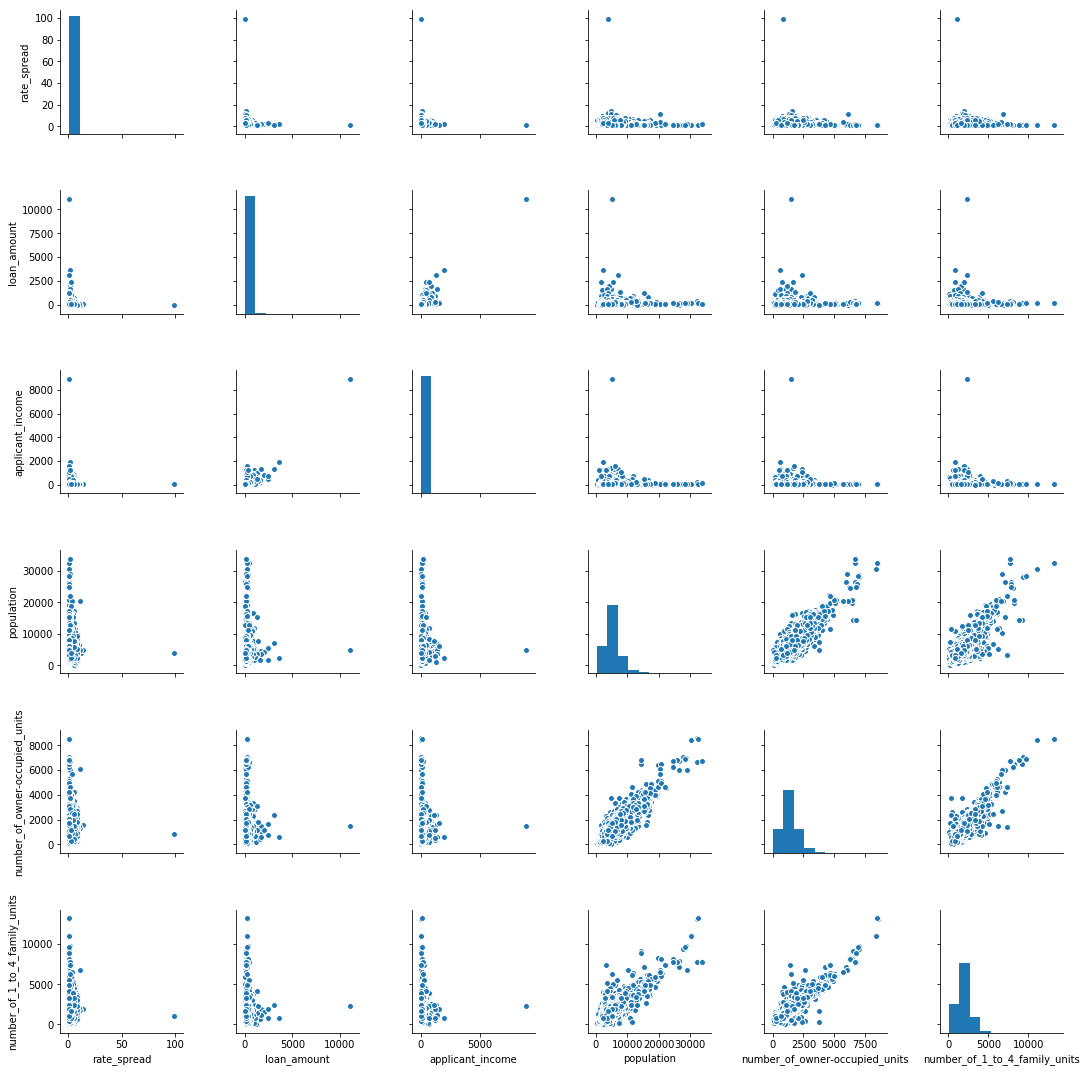

In [23]:
# Seaborn visualization library
numerical = ['rate_spread', 'loan_amount', 'applicant_income', 'population','number_of_owner-occupied_units','number_of_1_to_4_family_units']

import seaborn as sns
# Create the default pairplot
num = data[numerical]
num = num.dropna()
sns.pairplot(num.sample(10000))
numerical = ['rate_spread', 'loan_amount', 'applicant_income', 'population','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']


In [24]:
data = data.dropna()

def pearsons(X, y, data_cols):
    for col in data_cols:
#         print(col)
        corr, _ = pearsonr(data[col],data[n])
#         print('Pearsons correlation: %.3f' % corr)
        print(corr)

for n in numerical:
    pearsons(num, n, numerical)
    print()

1.0
-0.25533820126852946
-0.019062993594551256
-0.0327257726304296
-0.09440416969554727
0.012161882480173665
0.008541337055855832
0.02559843046935134

-0.25533820126852946
1.0
0.4500425975556711
0.07026010587561912
0.2451187604435787
0.11440943948893095
0.028419450860873205
-0.024931299583254376

-0.019062993594551256
0.4500425975556711
1.0
0.01388561145672428
0.08855518170327693
0.0875457760785201
0.022911459790310507
0.0008612700330110502

-0.0327257726304296
0.07026010587561912
0.01388561145672428
1.0
0.027927184701238734
0.1558364039532864
0.8558663301672427
0.8371065955435663

-0.09440416969554727
0.2451187604435787
0.08855518170327693
0.027927184701238734
1.0
-0.13234511368747753
0.00812519396885839
-0.10681575444887843

0.012161882480173665
0.11440943948893095
0.0875457760785201
0.1558364039532864
-0.13234511368747753
1.0
0.368858538989857
0.22874929707723168

0.008541337055855832
0.028419450860873205
0.022911459790310507
0.8558663301672427
0.00812519396885839
0.368858538989857


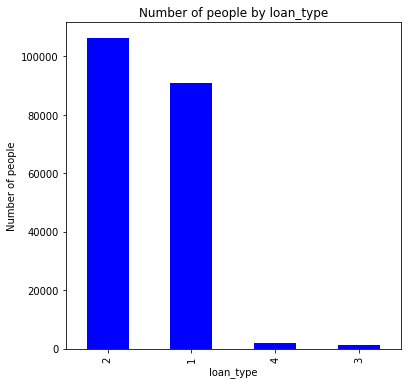

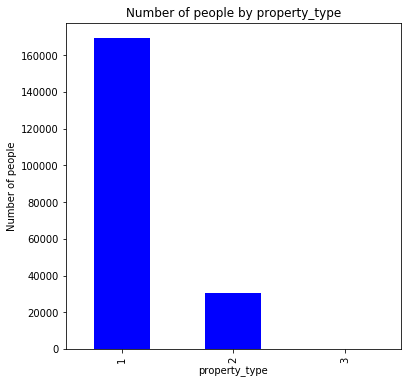

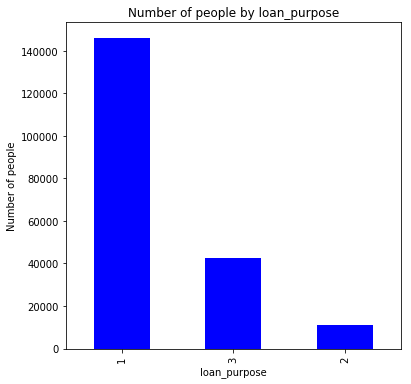

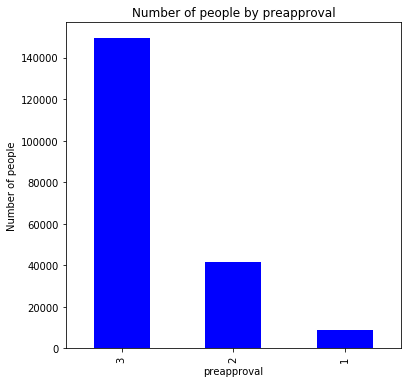

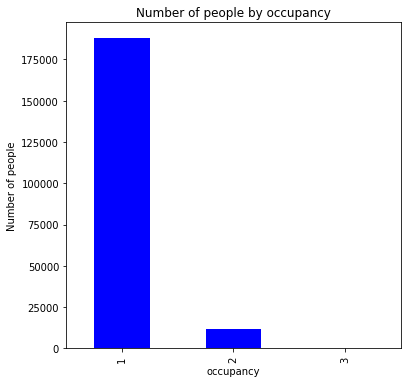

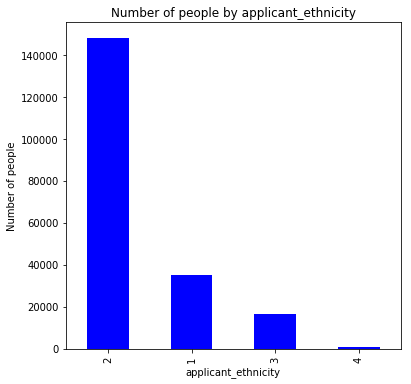

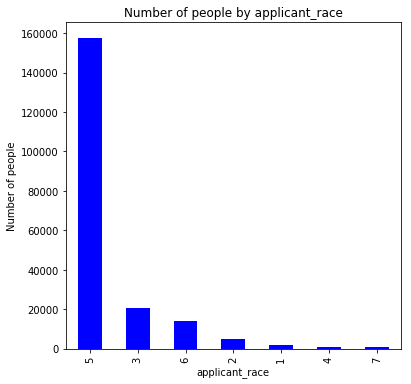

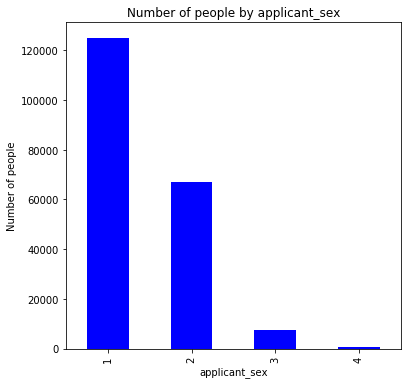

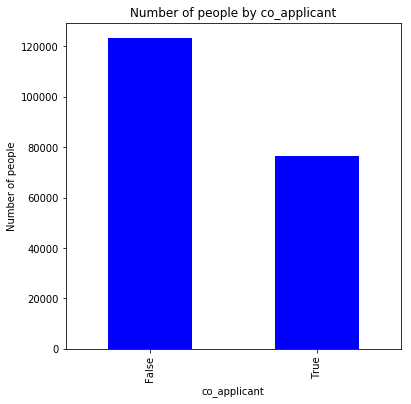

In [25]:
cols = list(data.columns)
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        counts = data[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of people by ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of people')
        plt.show

fresh_data = data = pd.read_csv('train_values.csv')
plot_cols = ['loan_type', 'property_type', 'loan_purpose', 'preapproval','occupancy','applicant_ethnicity','applicant_race','applicant_sex','co_applicant']
plot_bars(data, plot_cols)

In [26]:
print(data.shape)

(200000, 22)


In [27]:
# box_plot_data = data.loc[data['rate_spread'] < 15]


# def plot_box(data, cols, col_y = 'rate_spread'):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.boxplot(col, col_y, data=data)
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel(col_y)# Set text for y axis
#         plt.show()
        
# cat_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 
#             'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
# plot_box(box_plot_data, cat_cols)    

KeyError: 'rate_spread'